In [10]:
!pip install requests pandas numpy geopandas seaborn matplotlib

In [1]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Economic Indicators

In [2]:
#iterates through ac5 data,
# I am filtering through Oregon and cities

API_key = '57c26501ddcc34b05931d602c9bde30020f36ab4'

all_data = []

for year in np.arange(2013, 2024):
    url = f'https://api.census.gov/data/{year}/acs/acs5'
    params = {
        'get': 'NAME,B19013_001E',
        'for': 'place:*',
        'in': 'state:41',
        'key': API_key}
    response = requests.get(url, params=params)
    response = requests.get(url, params=params)
    data = response.json()
    df = pd.DataFrame(data[1:], columns = data[0])
    df['year'] = year
    all_data.append(df)

acs_df = pd.concat(all_data, ignore_index = True)
acs_df.tail()

,NAME,B19013_001E,state,place,year
4342,"Woodburn city, Oregon",67469,41,83750,2023
4343,"Wood Village city, Oregon",72404,41,83950,2023
4344,"Yachats city, Oregon",70000,41,84200,2023
4345,"Yamhill city, Oregon",121250,41,84250,2023
4346,"Yoncalla city, Oregon",55000,41,84600,2023


In [3]:
#data cleaning

#Im renaming the column name to median household income in the past 12months
median_household = acs_df.rename(columns = {'B19013_001E':'Median Household Income'})
median_household.head(5)

#im turning median income into integers since they're strings
median_household['Median Household Income'] = pd.to_numeric(median_household['Median Household Income'], errors ='coerce')
median_household['year'] = pd.to_numeric(median_household['year'], errors ='coerce')

#getting rid of na values or negative values
invalid_count = (median_household['Median Household Income'] <= 0).sum()
total_count = len(median_household)
print(f"Invalid values: {invalid_count} ({invalid_count / total_count:.2%} of total)")

median_household = median_household[median_household['Median Household Income'] > 0]

#grouping by year to get avg income over time (Hermiston city)
median_household_herm = median_household[median_household['NAME'] == 'Hermiston city, Oregon']
#grouped_herm = median_household_herm.groupby('year')[['Median Household Income']].mean()
#grouped_herm = grouped_herm.reset_index()
grouped_herm = median_household_herm

#grouping by year to get avg income over time (Klamath Falls-near site)
median_household_kla = median_household[median_household['NAME'] == 'Klamath Falls city, Oregon']
#grouped_kla = median_household_kla.groupby('year')[['Median Household Income']].mean()
#grouped_kla = grouped_kla.reset_index()
grouped_kla = median_household_kla

Invalid values: 346 (7.96% of total)


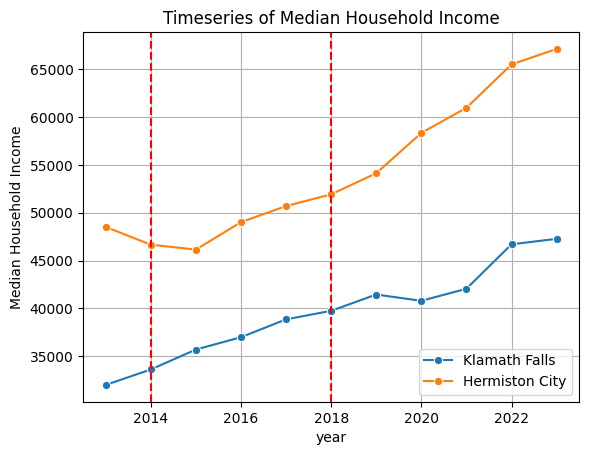

In [4]:
sns.lineplot(data = grouped_kla, x = 'year', y = 'Median Household Income', marker = 'o', label = 'Klamath Falls')
sns.lineplot(data = grouped_herm, x = 'year', y = 'Median Household Income', marker = 'o', label = 'Hermiston City')

plt.title('Timeseries of Median Household Income')
plt.legend()
plt.grid(True)
plt.axvline(x=2014, color = 'red', linestyle = '--', label = 'Remedial Action Began')
plt.axvline(x=2018, color = 'red', linestyle = '--', label = 'Cleanup Completed')


# Demographic Indicators

In [5]:
#iterates through ac5 data,
# I am filtering through Oregon and cities

API_key = '57c26501ddcc34b05931d602c9bde30020f36ab4'

ethnicity_data = []

for year in np.arange(2013, 2024):
    url = f'https://api.census.gov/data/{year}/acs/acs5'
    params1 = {
        'get': 'NAME,B03001_001E,B03003_003E,B02001_002E,B02001_003E,B02001_005E',
        'for': 'place:*',
        'in': 'state:41',
        'key': API_key}

    response1 = requests.get(url, params=params1)
    data1 = response1.json()
    df1 = pd.DataFrame(data1[1:], columns = data1[0])
    df1['year'] = year
    ethnicity_data.append(df1)

ethnicity_df = pd.concat(ethnicity_data, ignore_index = True)
ethnicity_df.tail()

,NAME,B03001_001E,B03003_003E,B02001_002E,B02001_003E,B02001_005E,state,place,year
4342,"Woodburn city, Oregon",26845,16813,13209,84,241,41,83750,2023
4343,"Wood Village city, Oregon",4611,2299,2513,28,89,41,83950,2023
4344,"Yachats city, Oregon",881,34,801,5,1,41,84200,2023
4345,"Yamhill city, Oregon",1179,114,1068,0,50,41,84250,2023
4346,"Yoncalla city, Oregon",1106,40,973,0,3,41,84600,2023


In [6]:
ethnicity_df = ethnicity_df.rename(columns ={
    'B03001_001E': 'Total_Pop',
    'B03003_003E': 'Hispanic_or_Latino',
    'B02001_002E': 'White_alone',
    'B02001_003E': 'Black_alone',
    'B02001_005E': 'Asian_alone'
})

eth_column = ['Total_Pop','Hispanic_or_Latino','White_alone','Black_alone','Asian_alone']
for i in eth_column:
    if i in ethnicity_df.columns:
        ethnicity_df[i] = pd.to_numeric(ethnicity_df[i], errors ='coerce')

Klamath_falls_ethnicity = ethnicity_df[ethnicity_df['NAME'] == 'Klamath Falls city, Oregon']
Klamath_falls_ethnicity.head(5)

,NAME,Total_Pop,Hispanic_or_Latino,White_alone,Black_alone,Asian_alone,state,place,year
96,"Klamath Falls city, Oregon",21026,2811,17864,218,427,41,39700,2013
712,"Klamath Falls city, Oregon",21165,2512,18006,311,339,41,39700,2014
903,"Klamath Falls city, Oregon",21261,2852,18217,301,312,41,39700,2015
1406,"Klamath Falls city, Oregon",21322,2971,18369,275,201,41,39700,2016
1577,"Klamath Falls city, Oregon",21113,2790,18039,394,213,41,39700,2017


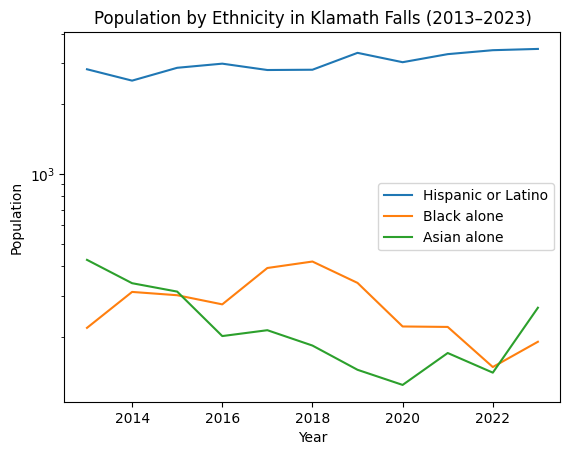

In [9]:
# ethnicity_log = np.log10(Klamath_falls_ethnicity[['Hispanic_or_Latino','White_alone','Black_alone','Asian_alone']])
sns.lineplot(data=Klamath_falls_ethnicity, x='year', y='Hispanic_or_Latino',label='Hispanic or Latino')
sns.lineplot(data=Klamath_falls_ethnicity, x='year', y='Black_alone', label='Black alone')
sns.lineplot(data=Klamath_falls_ethnicity, x='year', y='Asian_alone', label='Asian alone')

plt.title('Population by Ethnicity in Klamath Falls (2013–2023)')
plt.ylabel('Population')
plt.xlabel('Year')
plt.legend()
plt.yscale('log')
plt.show()
